# Independent Component Analysis(ICA)

# Independent Component Analysis (ICA): A Deep Dive

## Problem Context: The Cocktail Party Problem
The cocktail party problem is a classic example of source separation. Imagine you're in a room where multiple people are speaking simultaneously, and you have several microphones recording the mixed audio signals. The goal is to separate the voices of the individual speakers from the recorded mixtures.

---

## The Mathematical Framework

### 1. Observed Data (Mixed Signals)
Let the observed signals be represented as:
$
X = A \cdot S
$
- $X$: A matrix of observed signals (mixed signals), where each column corresponds to a signal recorded by a microphone.
- $A$: A mixing matrix, which combines the independent source signals.
- $S$: A matrix of independent source signals (e.g., voices of different speakers).

The goal of ICA is to recover $S$ (the independent source signals) using only $X$.

---

### 2. Assumptions of ICA
ICA relies on three key assumptions:
1. **Linearity**:
   - The observed signals are linear mixtures of the source signals.
2. **Statistical Independence**:
   - The source signals $S$ are statistically independent.
3. **Non-Gaussianity**:
   - The source signals are non-Gaussian. This is crucial for separation since Gaussian signals cannot be separated based solely on statistical independence.

---

### 3. ICA Objective
ICA seeks a demixing matrix $W$ such that:
$
S_{\text{estimated}} = W \cdot X
$
where $S_{\text{estimated}}$ approximates the original independent sources $S$.

---

## Key Steps in ICA

### Step 1: Centering
The data is centered to ensure zero mean for each feature:
$
X_{\text{centered}} = X - \mu
$
This simplifies subsequent calculations by aligning the data with the origin.

---

### Step 2: Whitening
Whitening removes correlations between features and scales the data to unit variance:
$
X_{\text{whitened}} = W_{\text{whitening}} \cdot X_{\text{centered}}
$
- Whitening ensures that the covariance matrix of $X_{\text{whitened}}$ is the identity matrix:
$
\text{Cov}(X_{\text{whitened}}) = I
$

---

### Step 3: Iterative Optimization
The weight matrix $W$ is iteratively optimized to maximize the statistical independence of the estimated components. This involves:
1. Applying a **non-linear function** to amplify non-Gaussianity:
   $
   g(x) = \tanh(x)
   $
2. Updating $W$ using gradient-based optimization and normalizing it after each update to maintain stability.

---

### Step 4: Decorrelation
To ensure orthogonality of the weight matrix $W$, it is decorrelated after each iteration:
$
W_{\text{decorrelated}} = Q \cdot D \cdot Q^\top \cdot W
$
where $Q$ and $D$ are derived from the eigenvalue decomposition of $W W^\top$.

---

### Step 5: Projection
Once $W$ is optimized, the independent components are extracted by projecting the whitened data:
$
S = W \cdot X_{\text{whitened}}
$

---

## How ICA Solves the Cocktail Party Problem
1. **Input**:
   - The observed signals $X$ are mixtures of the original independent sources.
2. **Processing**:
   - ICA learns a demixing matrix $W$ that inverts the mixing process.
3. **Output**:
   - The independent components $S_{\text{estimated}}$ are the separated source signals (e.g., the voices of individual speakers).

---

## Applications of ICA
1. **Audio Signal Processing**:
   - Separating voices or musical instruments from mixed audio recordings.
2. **Neuroscience**:
   - Analyzing EEG or fMRI data to identify independent brain activity patterns.
3. **Financial Analysis**:
   - Identifying independent factors driving market behaviors.

---

## Summary
ICA is a powerful algorithm for blind source separation. By leveraging the principles of statistical independence and non-Gaussianity, ICA can decompose mixed signals into their independent components, solving problems like the cocktail party problem.


# Step 1: Initializing Parameters

## Parameters in the ICA Class

### 1. `n_components`
- **Definition**: The number of independent components to extract from the data.
- **Purpose**: Determines the size of the weight matrix and the number of independent signals to recover.
- **Typical Use Case**: If the input data has $n_{\text{features}}$, `n_components` is usually less than or equal to $n_{\text{features}}$.
- **Initialization**: $self.n_components = n_components$
---

### 2. `max_iter`
- **Definition**: The maximum number of iterations the algorithm will run before stopping.
- **Purpose**: Acts as a safeguard to ensure the algorithm terminates even if convergence isn't achieved.
- **Typical Use Case**: Values like 1000 or higher are common for complex datasets.
- **Initialization**: $self.max_iter = max_iter$

---

### 3. `tol`
- **Definition**: The convergence tolerance, controlling when the algorithm stops iterating.
- **Purpose**: If the change between iterations falls below this threshold, the algorithm assumes convergence and stops.
- **Typical Use Case**: Smaller values (e.g., $1e-5$) enforce stricter convergence but may increase runtime.
- **Initialization**: $self.tol = tol$

---

## Summary
In the `__init__` method of the ICA class, these parameters are stored as attributes for later use in the algorithm.


# Step 2: Centering the Data

## Goal
The purpose of centering is to ensure that the dataset has a mean of zero along each feature. This is a critical preprocessing step in ICA and other statistical methods.

## Mathematical Explanation
Given a dataset $X$ of shape $(n_{\text{samples}}, n_{\text{features}})$, the mean of each feature is computed as:
$
\mu = \frac{1}{n_{\text{samples}}} \sum_{i=1}^{n_{\text{samples}}} X[i]
$
The centered dataset is obtained by subtracting this mean from each feature:
$
X_{\text{centered}} = X - \mu
$

## Importance of Centering
1. **Statistical Independence**: Centering removes the bias introduced by non-zero means, which is crucial for identifying independent components.
2. **Simplifies Whitening**: Whitening transforms the covariance matrix into an identity matrix. Centering ensures that the covariance matrix is well-defined and unbiased.
3. **Numerical Stability**: Subtracting the mean can improve numerical stability in subsequent steps, like eigenvalue decomposition.

## Example Dataset
Consider the dataset:
$
X = 
\begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
$
After centering, each column should have a mean of zero.


# Step 3: Whitening the Data

## Goal
Whitening transforms the dataset so that its variables are decorrelated and have unit variance. This simplifies the optimization in ICA by standardizing the data and aligning it to a "spherical" feature space.

---

## Mathematical Foundation

### 1. Covariance Matrix
The covariance matrix measures the linear relationships between features:
$
\text{Cov}(X) = \frac{1}{n - 1} X^\top X
$
In practice, we compute the covariance matrix using:
$
\text{Cov}(X) = \text{np.cov}(X, \text{rowvar=False})
$
- **Why `rowvar=False`?** By default, `np.cov` assumes rows are variables and columns are observations. Setting `rowvar=False` ensures rows represent samples, and columns represent features.

### 2. Eigenvalue Decomposition
The covariance matrix is symmetric, so it can be decomposed into eigenvalues and eigenvectors:
$
\text{Cov}(X) = Q \Lambda Q^\top
$
- $Q$: Orthogonal matrix of eigenvectors.
- $\Lambda$: Diagonal matrix of eigenvalues.
- Eigenvalues represent the variance in the direction of the corresponding eigenvectors.

### 3. Whitening Transformation
To whiten the data, we construct a whitening matrix $W$ using the eigenvalues and eigenvectors:
$
W = Q \Lambda^{-1/2} Q^\top
$
- $\Lambda^{-1/2}$: Diagonal matrix where each eigenvalue $\lambda$ is replaced by $1 / \sqrt{\lambda}$.
- $Q$: Rotates the data to decorrelate it, and $\Lambda^{-1/2}$ scales it to unit variance.

The whitened data is:
$
X_{\text{whitened}} = X W
$

---

## Implementation Steps

1. **Covariance Matrix**:
   Compute the covariance matrix of $X$ using:
   $
   \text{covariance} = \text{np.cov}(X, \text{rowvar=False})
   $

2. **Eigenvalue Decomposition**:
   Perform eigenvalue decomposition on the covariance matrix:
   $
   \text{eigvals}, \text{eigvecs} = \text{np.linalg.eigh}(\text{covariance})
   $
   - `eigvals`: Eigenvalues (variances along principal axes).
   - `eigvecs`: Eigenvectors (principal axes).

3. **Whitening Matrix**:
   Construct the diagonal matrix from the eigenvalues:
   $
   D = \text{diag}(1 / \sqrt{\text{eigvals}})
   $
   Compute the whitening matrix:
   $
   W = \text{eigvecs} \cdot D \cdot \text{eigvecs}^\top
   $

4. **Transform the Data**:
   Apply the whitening matrix to the dataset:
   $
   X_{\text{whitened}} = X \cdot W
   $

---

## Why Whitening is Important

1. **Decorrelates Variables**:
   After whitening, the covariance matrix of the data becomes the identity matrix:
   $
   \text{Cov}(X_{\text{whitened}}) = I
   $

2. **Equalizes Variance**:
   Ensures all features have unit variance, simplifying the ICA optimization process.

3. **Numerical Stability**:
   Reduces sensitivity to differences in scaling and correlations, making the algorithm more robust.

---

## Summary
Whitening prepares the data for ICA by removing correlations and standardizing variance. It ensures that the independent component extraction focuses on higher-order statistics, as lower-order correlations are eliminated.


# Step 4: Non-Linear Function (`_g`)

## Purpose
The non-linear function in ICA is used to approximate statistical independence by maximizing non-Gaussianity. It operates on the transformed data during optimization and plays a key role in the weight update step.

---

## Mathematical Explanation

### Why Non-Linear?
- **Gaussian Distributions**: The central limit theorem states that a sum of independent random variables tends to be Gaussian, even if the original variables are not.
- **Non-Gaussianity as a Measure**: ICA leverages the idea that independent components are less Gaussian than mixtures. A non-linear function enhances the separation of independent signals by amplifying non-Gaussian features.

---

### The Hyperbolic Tangent Function (`tanh`)
One common choice for the non-linear function is the hyperbolic tangent:
$
g(x) = \tanh(x)
$
- **Definition**:
  $
  \tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^x - e^{-x}}{e^x + e^{-x}}
  $
- **Range**: $(-1, 1)$
- **Shape**: A smooth, S-shaped curve that saturates as $x \to \pm \infty$.

---

### Why Use `tanh` in ICA?
1. **Amplifies Non-Gaussianity**: It is non-linear, emphasizing differences in the distribution shape between Gaussian and non-Gaussian signals.
2. **Robustness**: Smooth and bounded, preventing extreme values that could destabilize optimization.
3. **Mathematical Simplicity**: Its derivative (used in weight updates) is straightforward:
   $
   g'(x) = 1 - (\tanh(x))^2
   $

---

## Implementation Details
- Input: A single variable or NumPy array $x$ containing the data to transform.
- Output: The transformed data after applying $\tanh(x)$.
- Key Step: Use `np.tanh(x)` for element-wise application of the hyperbolic tangent.

---

## Summary
The non-linear function $\tanh(x)$ is essential for ICA to extract independent components. It enhances non-Gaussianity and stabilizes the optimization process, making it an ideal choice for this step.


# Step 5: Derivative of the Non-Linear Function (`_g_prime`)

## Purpose
The derivative of the non-linear function is critical for the optimization process in ICA. It provides the gradient information necessary for updating the weights in the algorithm.

---

## Mathematical Explanation

### The Non-Linear Function
The non-linear function used in ICA is:
$
g(x) = \tanh(x)
$
- Recall that $\tanh(x)$ is defined as:
$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$

---

### Derivative of $\tanh(x)$
Using calculus, the derivative of $\tanh(x)$ can be derived as:
$
g'(x) = 1 - (\tanh(x))^2
$

**Why?**
1. From the definition of $\tanh(x)$:
   $
   \tanh(x) = \frac{\sinh(x)}{\cosh(x)}
   $
   - The derivative of $\sinh(x)$ is $\cosh(x)$.
   - The derivative of $\cosh(x)$ is $\sinh(x)$.
2. Applying the quotient rule:
   $
   \frac{d}{dx} \tanh(x) = \frac{\cosh(x)\cosh(x) - \sinh(x)\sinh(x)}{\cosh^2(x)}
   $
   - Simplify the numerator using the hyperbolic identity:
     $
     \cosh^2(x) - \sinh^2(x) = 1
     $
   - Thus:
     $
     g'(x) = \frac{1}{\cosh^2(x)}
     $
3. Using the identity:
   $
   \frac{1}{\cosh^2(x)} = 1 - (\tanh(x))^2
   $
   - The result is:
     $
     g'(x) = 1 - (\tanh(x))^2
     $

---

## Why This Formula is Useful
1. **Efficiency**:
   - The derivative is computed using only the value of $\tanh(x)$, avoiding recomputation of $\cosh(x)$ or $\sinh(x)$.

2. **Optimization**:
   - The derivative scales the weight updates in ICA, guiding the algorithm to converge faster and more accurately.

---

## Implementation Details
- Input: A single variable or NumPy array $x$ containing the data.
- Output: The derivative $g'(x)$, computed element-wise as $1 - (\tanh(x))^2$.
- Key Step: Use `np.tanh(x)` to compute the tangent hyperbolic and square it to obtain the derivative.

---

## Summary
The derivative of the non-linear function, $g'(x) = 1 - (\tanh(x))^2$, is vital for ICA as it enables gradient-based optimization. Its simplicity and efficiency make it a natural choice for this process.


# Step 6: Fitting the ICA Model (`fit`)

## Purpose
The `fit` method trains the ICA model on the given dataset. It finds the unmixing matrix \( W \) that separates mixed signals into statistically independent components.

---

## Key Steps in `fit`

### 1. Preprocessing
Before starting the ICA optimization, the input data \( X \) must be:
1. **Centered**:
   Remove the mean of each feature to ensure zero-mean data.
   $
   X = \text{self.\_center}(X)
   $
2. **Whitened**:
   Decorrelate and scale the data to unit variance.
   $
   X = \text{self.\_whiten}(X)
   $

---

### 2. Initialize Parameters
- **Weight Matrix**:
  Initialize the unmixing matrix \( W \) with random values:
  $
  W = \text{np.random.randn}(\text{self.n\_components}, n\_features)
  $

- **Shape Parameters**:
  Determine the number of samples and features:
  $
  n\_samples, n\_features = X.\text{shape}
  $

---
### 1. Preprocessing
Before starting the ICA optimization, the data must be prepared:
1. **Centering**:
   - Subtract the mean from each feature to ensure the data has zero mean.
   - This step is critical because ICA assumes the input data is centered.
   - Use the `_center` method you implemented earlier:
     $
     X = \text{self.\_center}(X)
     $

2. **Whitening**:
   - Decorrelate and normalize the data so that each feature has unit variance.
   - This step simplifies the ICA optimization by aligning the data into a spherical space.
   - Use the `_whiten` method:
     $
     X = \text{self.\_whiten}(X)
     $

---

### 2. Initialization
The following parameters must be initialized:
1. **Number of Samples and Features**:
   - Determine the dimensions of the input data \( X \):
     $
     n_{\text{samples}}, n_{\text{features}} = X.\text{shape}
     $

2. **Weight Matrix**:
   - Initialize the unmixing matrix \( W \) with random values:
     $
     W = \text{np.random.randn}(\text{self.n\_components}, n_{\text{features}})
     $
   - This matrix will be iteratively updated to find the independent components.

---

## Summary of Missing Steps
1. Preprocess the input data by centering and whitening it.
2. Initialize the necessary variables: the number of samples, features, and the random weight matrix.

These steps prepare the data and parameters for the iterative optimization process, which is already included in the provided code.

### 3. Iterative Optimization
1. **Iterate**:
   Run the optimization loop for up to `self.max_iter` iterations:
   $
   \text{for } i \text{ in range}(\text{self.max\_iter}):
   $

2. **Update Each Component**:
   For each component \( j \), calculate:
   - \( wx = X \cdot W[j] \): The projection of \( X \) onto the \( j \)-th weight vector.
   - \( g\_wx = g(wx) \): Apply the non-linear function.
   - \( g\_prime\_wx = g'(wx) \): Compute its derivative.
   - Update \( W[j] \) using the formula:
     $
     W[j] = \frac{X^\top \cdot g\_wx - \text{mean}(g\_prime\_wx) \cdot W[j]}{n\_samples}
     $
   - Normalize \( W[j] \) to have unit length:
     $
     W[j] /= \|\| W[j] \|\|
     $

3. **Decorrelate the Weight Matrix**:
   After updating all components, decorrelate \( W \) to ensure orthogonality:
   $
   W = \text{self.\_decorrelate}(W)
   $

4. **Check Convergence**:
   Compute the maximum absolute change in the diagonals of \( W \cdot W_{\text{old}}^\top \):
   $
   \text{max\_abs\_change} = \text{np.max(np.abs(np.abs(np.diag(W @ W\_old.T)) - 1))}
   $
   If the change is less than `self.tol`, stop the iterations.

---

### 4. Finalize
- Store the final weight matrix as the learned components:
  $
  \text{self.components\_} = W
  $
- Return the fitted model instance.

---

## Summary
The `fit` method optimizes the weight matrix \( W \) to separate independent components by:
1. Preprocessing the data (centering and whitening).
2. Iteratively updating \( W \) using gradient-based optimization and ensuring orthogonality.
3. Stopping when the convergence criterion is met or the maximum iterations are reached.


# Step 7: Decorrelating the Weight Matrix (`_decorrelate`)

## Purpose
The goal of this step is to ensure that the rows of the weight matrix $W$ remain orthogonal during the ICA optimization process. Orthogonality is critical because independent components should be extracted without overlapping or redundancy.

---

## Mathematical Explanation

### Why Decorrelate?
1. **Orthogonality**:
   - In ICA, the weight matrix $W$ should ideally represent independent directions in the feature space. This requires its rows (or components) to be orthogonal to each other.
2. **Stability**:
   - Without decorrelation, the optimization process might converge to suboptimal or unstable solutions due to redundancy between components.

### Matrix Orthogonality
A matrix $W$ is orthogonal if:
$
W W^\top = I
$
where $I$ is the identity matrix.

---

### Steps to Decorrelate

1. **Compute $W W^\top$**:
   - The product $W W^\top$ gives a symmetric matrix representing the correlation between rows of $W$.

2. **Eigenvalue Decomposition**:
   - Perform eigenvalue decomposition on $W W^\top$:
     $
     W W^\top = Q \Lambda Q^\top
     $
     - $Q$: Orthogonal matrix of eigenvectors.
     - $\Lambda$: Diagonal matrix of eigenvalues.

3. **Construct Normalization Matrix**:
   - Create a diagonal matrix $D$ that scales each eigenvalue by its inverse square root:
     $
     D = \text{diag}(1 / \sqrt{\lambda})
     $
     where $\lambda$ are the eigenvalues.

4. **Transform $W$**:
   - Normalize $W$ using the eigenvectors and the normalization matrix:
     $
     W_{\text{decorrelated}} = Q D Q^\top W
     $
   - This ensures that $W_{\text{decorrelated}} W_{\text{decorrelated}}^\top = I$.

---

## Implementation Steps
1. Compute $W W^\top$.
2. Perform eigenvalue decomposition on $W W^\top$ to obtain eigenvalues and eigenvectors.
3. Construct the normalization matrix $D$ from the eigenvalues.
4. Apply the transformation to $W$ using the eigenvectors and $D$.

---

## Why This Works
1. The eigenvalue decomposition aligns the matrix to an orthogonal basis.
2. Normalizing by the eigenvalues ensures unit-length scaling in each direction, resulting in an orthogonal matrix.

---

## Summary
The `_decorrelate` method ensures that the weight matrix remains orthogonal, a critical property for extracting independent components. This step stabilizes and improves the convergence of the ICA algorithm.

---

## Your Task
1. Implement the `_decorrelate` method based on the explanation.
2. Test it on a sample matrix $W$ to ensure it returns an orthogonal matrix.


# Step 8: Transforming the Data (`transform`)

## Purpose
The `transform` method applies the trained ICA model to a new dataset $X$. It projects the input data onto the learned independent components to extract their representations.

---

## Mathematical Explanation

### 1. Preprocessing
Before applying the learned components, the input data $X$ must be:
1. **Centered**:
   - Remove the mean of each feature:
     $
     X_{\text{centered}} = X - \mu
     $
   - This ensures that the data aligns with the assumptions of the trained ICA model.

2. **Whitened**:
   - Decorrelate and scale the data to unit variance:
     $
     X_{\text{whitened}} = W_{\text{whitening}} \cdot X_{\text{centered}}
     $
   - Whitening simplifies the subsequent projection step by normalizing the feature space.

---

### 2. Projection onto Independent Components
Once the data is preprocessed, it is projected onto the learned independent components:
$
S = X_{\text{whitened}} \cdot W_{\text{components}}^\top
$
- $W_{\text{components}}$: The weight matrix learned during the `fit` step, which contains the directions of the independent components.
- $S$: The extracted independent components of the input data.

---

## Key Steps in `transform`
1. **Center the Data**:
   - Use the `_center` method to ensure zero-mean input.
2. **Whiten the Data**:
   - Use the `_whiten` method to decorrelate and normalize the input.
3. **Project onto Components**:
   - Multiply the preprocessed data by the transpose of `self.components_`.

---

## Why This Works
1. The learned matrix `self.components_` captures the directions of the independent components.
2. By projecting the preprocessed data onto these directions, we recover the independent components present in the new data.

---

## Summary
The `transform` method extracts independent components from a new dataset by:
1. Centering and whitening the data.
2. Projecting it onto the learned independent components.


# Step 9: Combining Fitting and Transformation (`fit_transform`)

## Purpose
The `fit_transform` method combines two key steps:
1. **Fit**:
   - Trains the ICA model on the dataset $X$ to learn the independent components.
2. **Transform**:
   - Projects the input data $X$ onto the learned independent components to extract their representations.

This method is useful for workflows where the dataset $X$ is both the training set and the data to be transformed.

---

## Mathematical Explanation

### 1. Fitting the ICA Model
The `fit` step involves:
1. **Centering**:
   - Remove the mean of each feature in $X$.
2. **Whitening**:
   - Decorrelate and normalize the features to unit variance.
3. **Optimization**:
   - Iteratively update the weight matrix \( W \) to maximize the statistical independence of the components.
4. **Learned Components**:
   - Store the final weight matrix \( W \) as `self.components_`.

### 2. Transforming the Data
After fitting the model, the `transform` step:
1. Preprocesses the input data (centering and whitening).
2. Projects it onto the independent components:
   $
   S = X_{\text{whitened}} \cdot W_{\text{components}}^\top
   $
3. Returns the independent components \( S \).

---

## Implementation Steps

1. **Call the `fit` Method**:
   - Train the ICA model on $X$ to learn the independent components.
   - This step populates `self.components_` with the weight matrix \( W \).

2. **Call the `transform` Method**:
   - Use the trained model to extract independent components from $X$.

3. **Return the Transformed Data**:
   - The method returns the independent components as the output.

---

## Why `fit_transform` Works
1. **Combines Steps**:
   - By combining `fit` and `transform`, the method provides a seamless way to preprocess, train, and extract independent components in one step.
2. **Reusability**:
   - After `fit_transform` is called, the model is trained and can be reused to transform new datasets.

---

## Summary
The `fit_transform` method first trains the ICA model using `fit` and then extracts independent components from the same dataset using `transform`. It combines these steps into a single, convenient method.


Starting ICA fitting...
Iteration 0, change: 1.3055495001726078
Iteration 1, change: 0.0012452944914410624
Iteration 2, change: 0.0005997391255762041
Iteration 3, change: 0.0002734536808511878
Iteration 4, change: 0.0001215131822759341
Iteration 5, change: 5.337125746307514e-05
Iteration 6, change: 2.3320898175915872e-05
Iteration 7, change: 1.0166962624569287e-05
Iteration 8, change: 4.427914454985249e-06
Converged!
ICA fitting completed.
Original Signals (first 5 samples):
[[0.         0.        ]
 [0.01601533 1.        ]
 [0.03202655 1.        ]
 [0.04802956 1.        ]
 [0.06402025 1.        ]]

Recovered Signals (first 5 samples):
[[-0.17517734 -0.03858102]
 [-0.20119239  0.96408661]
 [-0.1779273   0.96322394]
 [-0.15467414  0.96236171]
 [-0.13143888  0.96150014]]


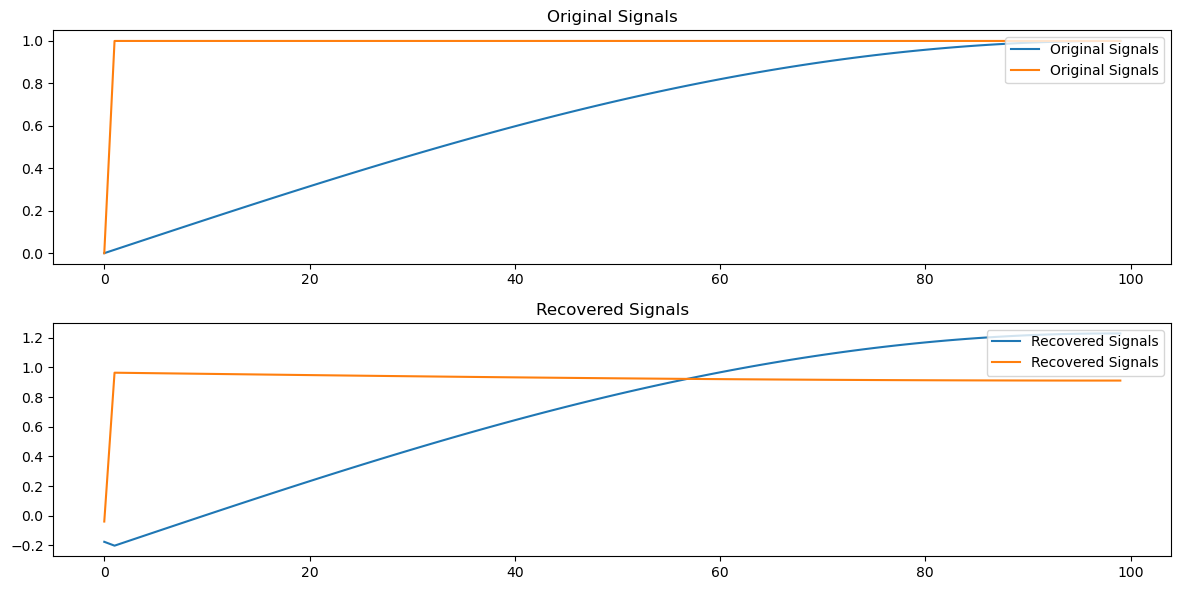

In [15]:
import numpy as np

class ICA:
    def __init__(self, n_components, max_iter=1000, tol=1e-5):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        
    def _center(self, X):
        """Centers the dataset (zero mean)."""
        self.mean  = X.mean(axis=0) # Average of the columns
        X = X-self.mean # Centering the dataset
        return X

    def _whiten(self, X):
        """Whitens the dataset (decorrelates the variables)."""
        covariance = np.cov(X, rowvar=False) # Covariance matrix of the matrix X, rowvar set to false since rows=samples and columns=features
        eig_vals, eig_vecs = np.linalg.eigh(covariance) #Eigenvalue decomp 
        self.whitening_matrix = eig_vecs@np.diag(1.0 / np.sqrt(eig_vals))@eig_vecs.T # The whitening matrix
        X_whitened = X@self.whitening_matrix # The altered x matrix
        return X_whitened

    def _g(self, x):
        """Non-linear function (logistic)."""
        return np.tanh(x)
 
    def _g_prime(self, x):
        """Derivative of the non-linear function."""
        return 1-np.tanh(x)**2

    def fit(self, X):
        X= self._center(X)
        X = self._whiten(X)
        n_samples, n_features = X.shape
        W= np.random.randn(self.n_components,n_features)

        print("Starting ICA fitting...")
        for i in range(self.max_iter):
            W_old = W.copy()
            for j in range(self.n_components):
                wx = np.dot(X, W[j])
                g_wx = self._g(wx)
                g_prime_wx = self._g_prime(wx)
                W[j] = (X.T @ g_wx - np.mean(g_prime_wx) * W[j]) / n_samples
                W[j] /= np.linalg.norm(W[j])

            # Decorrelate weights
            W = self._decorrelate(W)

            # Check convergence
            max_abs_change = np.max(np.abs(np.abs(np.diag(W @ W_old.T)) - 1))
            print(f"Iteration {i}, change: {max_abs_change}")
            if max_abs_change < self.tol:
                print("Converged!")
                break

        self.components_ = W
        print("ICA fitting completed.")
        return self

    def _decorrelate(self, W):
        """Ensures that the matrix W remains orthogonal."""
        matrix = W@W.T #Multiply W and its transpose
        eig_vals, eig_vecs = np.linalg.eigh(matrix) #Eigenvalue decomp
        return eig_vecs@np.diag(1.0 / np.sqrt(eig_vals))@eig_vecs.T@W
        

    def transform(self, X):
        X = self._center(X) #centering the data
        X= self._whiten(X) #Whitening the data
        return X@self.components_.T #Multiply components by altered X

    def fit_transform(self, X):        
        self.fit(X) 
        return self.transform(X)


# Example usage:
# X is your dataset with shape (n_samples, n_features)
# n_components is the number of independent components you want to extract

# Generate a random dataset for demonstration purposes
# Create synthetic sources
np.random.seed(0)
n_samples = 1000
time = np.linspace(0, 8, n_samples)

# Create two independent signals
s1 = np.sin(2 * time)  # Sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Square signal

# Stack signals into a matrix
S = np.c_[s1, s2]

# Mix the signals with a random mixing matrix
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
X = S @ A.T  # Generate observations by mixing the signals

# Apply ICA to separate the sources
ica = ICA(n_components=2)
S_ = ica.fit_transform(X)

print("Original Signals (first 5 samples):")
print(S[:5])
print("\nRecovered Signals (first 5 samples):")
print(S_[:5])

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Original signals
plt.subplot(2, 1, 1)
plt.plot(S[:100], label="Original Signals")
plt.title("Original Signals")
plt.legend(loc='upper right')

# Recovered signals
plt.subplot(2, 1, 2)
plt.plot(S_[:100], label="Recovered Signals")
plt.title("Recovered Signals")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()